<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

# Определение возраста покупателей

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
* Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
* Контролировать добросовестность кассиров при продаже алкоголя.

**Цель исследования:** — построить такую модель, которая могла бы по фотографии определить приблизительный возраст человека, учитывая, что значение MAE на тестовой выборке должно быть не больше 8.

**Ход исследования:**
1. Выполнить исследовательский анализ данных
2. Подготовить данные для дальнейшей работы
3. Обучить модель

## Импорт необходимых библиотек

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

## Исследовательский анализ данных

Загрузим данные:

In [3]:
labels = pd.read_csv('/datasets/faces/labels.csv')
datagen = ImageDataGenerator(rescale=1./255)
datagen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Теперь ты знаешь количество фотографий в датасете. Учитывая эту информацию, а также то, что ты знаешь что мы решаем задачу регрессии, попробуй порассуждать, достаточно ли имеющихся данных? Какие шаги мы можем предпринять в связи с этим?   

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Верно использован ImageDataGenerator как инструмент для доступа к потоку фотографий. Но обрати внимание на название переменных train_datagen  и train_gen_flow. На мой взгляд они не соответсвуют тому, что в них, ведь ты еще не производишь разделение потоков фотографий на обучающий и валидационный наборы.   
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента 1.0</b></font>
   
Названия переменных были изменены. 

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

Определим размер выборки:

In [4]:
features, target = next(datagen_flow)

In [5]:
features.shape

(32, 224, 224, 3)

In [6]:
target.shape

(32,)

Признаки — 32 фотографии размером 224х224 с тремя цветовыми каналами в одном батче. Целевой признак — возраст, 32 значения в одном батче.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Отлично, получили один батч данных, изучили размерности. Стоит написать, что означает каждая цифра в выведенных размерностях.</div>

Построим график распределения возраста:

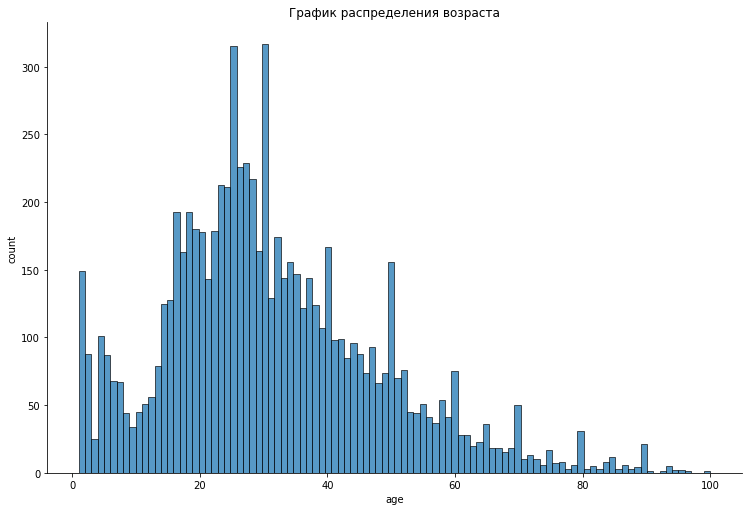

In [9]:
sns.displot(data=labels['real_age'], bins=100, height=7, aspect=1.5)
plt.xlabel('age')
plt.ylabel('count')
plt.title('График распределения возраста');

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Смысл предупреждений - функция distplot устарела и будет исключена из будущих версий библиотеки. Рекомендуется использовать histplot или displot.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Нужно вывести график распределения возраста для всех доступных данных (7591 объект), а не только для одного батча. Сразу советую взять количество бинов равное 100.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Напоминаю, что по правилам оформления проектов у графиков должны быть названия и подписаны оси (где это уместно).</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Напоминаю, что у всех изображений в проекте должны быть названия и подписаны оси (если это уместно).

Также советую избавиться от вывода текстового представления python-объектов, которые возвращают используемые тобой функции например 
    
    <AxesSubplot:xlabel='real_age'>
    
Это можно сделать достаточно просто, если добавить  точку с запятой
        
        
    sns.boxplot(labels["real_age"]);   
</div>


<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента 1.0</b></font>
   
Функция distplot была заменена на displot. График распределения был создан для всех доступных данных. Оси были подписаны.

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
<b>v2</b>    
Добавь пожалуйста название графику
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента 2.0</b></font>
   
Название было добавлено к графику.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v3</b> выполнено </div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>минутка теории</b> 
 По умолчанию jupyter notebook выводит результат вычислений в последней строке ячейки, если этот результат не записан в переменную. Мы часто пользуемся этим, обратившись к какому-нибудь объекту в последней строке и видим результат без дополнительных print() или dispay()
    
    
  Ниже три ячейки с кодом. Обрати внимание, если просто сделать вычисление - то результат выводится, но если добавить точку с запятой или записать результат в переменную, то ничего не происходит. Обрати внимание, когда происходит вывод:
   - последня строка
   - нет точки с запятой в конце
    
   - результат не записан в переменную
 
И досточно убрать одно из этих условий, как вывода нет.

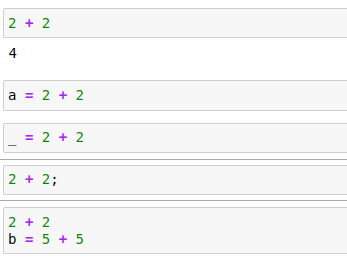    

 Функции matlitlib не только выводят графики, но и возвращают python объекты axis. Это внутренняя кухня, чтобы можно было строить сложные графики. Но для нас побочным эффектом является то, что в ноутбуке мы видим текстовое предоставление объекта, которое выводит ноутбук. И для красоты такое поведение стоит заблокировать. 



</div>

Выведем 10 фотографий из выборки:

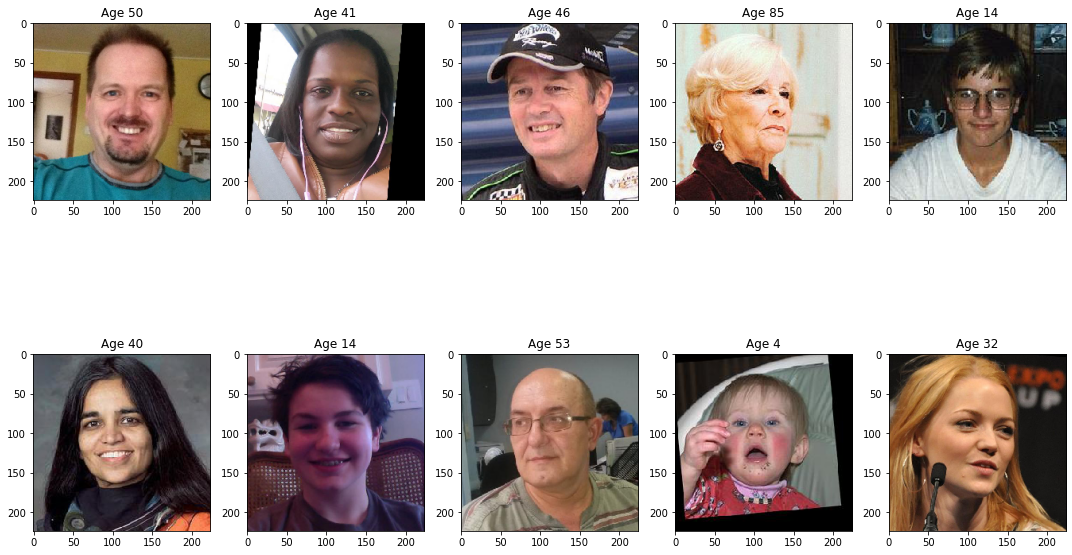

In [8]:
fig, ax = plt.subplots(figsize=(15,15), ncols=5, nrows=2)

img_num = 0
for i in range(2):
    for j in range(5):
        ax[i, j].title.set_text(f'Age {target[img_num]}')
        ax[i, j].imshow(features[img_num])
        plt.tight_layout()
        img_num+=1

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Очень хорошо, что выведены фотографии. Это хорошая практика, помогает увидеть изображения, с которыми будет работать наша модель, заметить какие-то детали и особенности, улучшить понимание задачи и получить определенную интуицию. А также заранее оценить подходящие для наших данных методы аугментации. </div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Кстати, можно дополнительно вывести возраст человека на фото, он содержится в переменной target. </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента 1.0</b></font>
   
Дополнительно над фотографиями был выведен возраст человека на фото.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

### Вывод

В изначальном датасете 7591 изображений. Для повышения качества модели выборку необходимо увеличить с помощью аугментации — использовать горизонтальное отражение.

На графике распределения видно, что минимальное значение целевого признака — 100, а минимальное — 1. Наибольшее количество фотографий распределено примерно от 20 и до 40. После 30 график идет на спад.

Изображения, входящие в датасет, различны по своей цветовой гамме, все лица на фотографиях изображены в разных положениях — в анфас, 3/4 и т.д.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Закончен раздел "Разведочный анализ" (EDA), но в нем совсем нет выводов. Попробую обозначить вопросы, которые нужно осветить:

   - Размер датасета,а также оценки, достаточно ли фотографий для решения поставленной задачи
   - Что мы можем сказать о нашем датасете исследовав распределение целевого признака (возраста). Минимальный максимальный возраст, где сконцентрирована большая часть фото, другие особенности.
   - Особенности данных, которые мы можем увидеть рассмотрев фото.
   - Рекомендованные аугментации.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента 1.0</b></font>
   
Был добавлен вывод.

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
<b>v2</b>    
Нужно добавить к выводам наблюдения, связаные с изображениями входящими в датасет. Что ты мошешь сказав о датасете, изучив несколько изображений?
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента 2.0</b></font>
   
Вывод был дополнен.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v3</b> выполнено </div>

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

from sklearn.metrics import mean_squared_error
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
 
 
def load_train(path):
    datagen = ImageDataGenerator(validation_split=0.2,
                                 horizontal_flip=True,
                                 rescale=1/255.)
 
    train_datagen_flow = datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path+'labels.csv'),
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224,224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345)
 
    return train_datagen_flow 
 
def load_test(path):
    datagen = ImageDataGenerator(validation_split=0.2, rescale=1/255.)
 
    test_datagen_flow = datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path+'labels.csv'),
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224,224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345)   
  
    return test_datagen_flow 
     
 
def create_model(input_shape):
    backbone = ResNet50(input_shape=input_shape,
                      weights='imagenet',
                      include_top=False)
 
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
 
    optimizer = Adam(lr=0.0003)
    model.compile(optimizer=optimizer, 
                  loss='mse',
                  metrics=['mae'])
 
    return model
 
 
def train_model(model, train_data, test_data, batch_size=None, epochs=7,
               steps_per_epoch=None, validation_steps=None):
    if steps_per_epoch is None:
      steps_per_epoch=len(train_data)
    if validation_steps is None:
      validation_steps=len(test_data)
    
    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, 
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
 
    return model

```

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Написаны функции для создания датагенераторов, а также создания и обучения модели. 
<hr>   
Молодец, что используешь агументацию для обучающего набора. 
<hr>   
    
Правильный выбор лосс-функции, также хорошо подобран шаг обучения.</div>

```

Train for 190 steps, validate for 48 steps
Epoch 1/7
190/190 - 52s - loss: 191.6768 - mae: 10.1517 - val_loss: 496.2266 - val_mae: 17.0751
Epoch 2/7
190/190 - 56s - loss: 91.8831 - mae: 7.2616 - val_loss: 488.3072 - val_mae: 16.8258
Epoch 3/7
190/190 - 61s - loss: 67.4240 - mae: 6.2274 - val_loss: 303.9550 - val_mae: 12.7886
Epoch 4/7
190/190 - 62s - loss: 49.4656 - mae: 5.4222 - val_loss: 140.6400 - val_mae: 9.1556
Epoch 5/7
190/190 - 63s - loss: 38.5602 - mae: 4.7769 - val_loss: 104.9785 - val_mae: 7.6746
Epoch 6/7
190/190 - 63s - loss: 32.6872 - mae: 4.4079 - val_loss: 106.5243 - val_mae: 7.7193
Epoch 7/7
190/190 - 62s - loss: 27.0616 - mae: 4.0468 - val_loss: 98.2992 - val_mae: 7.4176

```

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Модель обучена и преодолела планку требуемой точности </div>

## Анализ обученной модели

Таким образом, имеем изображения 224х224х3 в качестве признаков и возраст в качестве целевого признака. 

Для модели использовалась архитектура `ResNet` с предобученными весами. Для адаптации `ResNet` к задаче верхушка была убрана и последние слои были созданы самостоятельно.

Размер батча был выбран 32, в качестве оптимизатора был выбран алгоритм `Adam`. Функцией потерь была выбрана функция `Mean Squared Error`. С 7 эпохами модель доходит до требуемого значения `MAE`.

Для последних слоев был использован пулинг с окном во весь тензор (`GlobalAveragePooling2D`) и полносвязный слой для классификации (`Dense`) с функцией активации `ReLU`.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
В этом разделе стоит подробно расписать используемые для создания и обучения модели подходы:
    
 - Использованная архитектура (бэкбон + голова), а также загружались ли предобученные  или рандомные веса.
 - Параметры обучения: размер батча, оптимизатор, использовалась ли заморозка весов бэкбона,  количество эпох.
 - Достигнутые метрики, наблюдалось ли переобучение.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента 1.0</b></font>
   
Анализ был дополнен.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v3</b>

Проект принят. Поздравляю и желаю дальнейших успехов!
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v2</b>

Пожалуйста добавь название графика + наблюдения, относящиеся к изображениям в нашем датасете</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Давай подведем итоги. 
Проведен  EDA, а также создана нейронная сеть с ипользованием  предобученной модели и c помощью finetuning и transfer-learning дообучена  определять возраст покупателей. Требуемая точность получена. 
    
    
Что нужно доработать обязательно:
    
  - Пожалуйста переделай гистограмму распределения целевого признака
  - Пожалуйста напиши выводы в разделе "Разведочный анализ данных".
    
        
Жду твой проект на финальное ревью :)
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> дополнительные материалы </b>
В курсе уже есть ссылки на отдельные статьи. Со своей стороны поделюсь неплохими бесплатными курсами по нейронкам, дающим целостную картинку.
    
   - "Дип Лернинг на пальцах" (https://www.youtube.com/playlist?list=PL5FkQ0AF9O_o2Eb5Qn8pwCDg7TniyV1Wb).
   - Отличный бесплатный курс от Школы глубокого обучения МФТИ (https://stepik.org/org/dlschool), старт курса каждые пол года. Два семестра, один по основам и компьютерному зрению, второй по обработке естественного языка.
   - "Нейронные сети и компьютерное зрение" от Samsung Research Russia (https://stepik.org/course/50352/syllabus). Есть также продолжение по NLP.  

</div>